# Exercise-2: Decision Trees 
### Code preperations

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../archive/data.csv")
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M':1, 'B':0})

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

### Q2.1  Train a Decision Tree classifier using default parameters. Evaluate it on validation sets from original splits (report accuracy mean and std). 

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

clf = DecisionTreeClassifier(random_state=42) # No specified parameters
clf.fit(X_train, y_train)

y_val_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)

accuracies = [accuracy]  
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Std Accuracy: {np.std(accuracies):.4f}")


Validation Accuracy: 0.9386
Mean Accuracy: 0.9386
Std Accuracy: 0.0000


## Q2.2 From the trained model, comment on feature importance values and identify the top 3 features from your model. 

In [12]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

importances = pd.Series(clf.feature_importances_, index=X.columns)

print("Top 3 important features:")
print(importances.sort_values(ascending=False).head(3))

print("-------------")

#print("All feature importances:")                   # Can be ignored, just my curiosity
#print(importances.sort_values(ascending=False))


Top 3 important features:
perimeter_worst         0.704881
concave points_worst    0.136016
texture_worst           0.038957
dtype: float64
-------------


## Q2.3
Vary the max depth parameter (e.g., depth 2-10). Use validation accuracy (mean
± std from cross-validation on the training set) to choose the best depth. Provide
performance for each chosen depth (at-least 5 to be reported) and discuss the aspects
of overfitting vs. underfitting. 

In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np

depths = range(2, 11)
means, stds = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    means.append(scores.mean())
    stds.append(scores.std())

for d, m, s in zip(depths, means, stds):
    print(f"Depth={d}: Accuracy={m:.4f} ± {s:.4f}")


Depth=2: Accuracy=0.9298 ± 0.0309
Depth=3: Accuracy=0.9355 ± 0.0236
Depth=4: Accuracy=0.9326 ± 0.0343
Depth=5: Accuracy=0.9298 ± 0.0309
Depth=6: Accuracy=0.9298 ± 0.0395
Depth=7: Accuracy=0.9239 ± 0.0280
Depth=8: Accuracy=0.9239 ± 0.0406
Depth=9: Accuracy=0.9239 ± 0.0406
Depth=10: Accuracy=0.9239 ± 0.0406


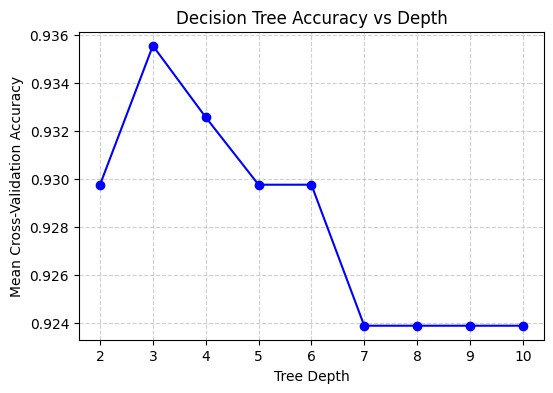

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(depths, means, marker='o', linestyle='-', color='b')
plt.title("Decision Tree Accuracy vs Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.xticks(depths)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



The depth with the highest accuracy is depth = 3. At smaller depths the model is underfitting, meaning it’s too simple to capture all patterns in the data. Causing loss of accuracy.
As the depth goes past 3, the accuracy actually decreases, meaning the model starts to overfit. Which means it learns too much detail from the training data and generalizes worse

## Q2.4 Repeat previous exercise with different min samples leaf values. Which setting generalizes best according to the validation set? 

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier

leaf_sizes = [1, 2, 4, 6, 8, 10]
means, stds = [], []

for leaf in leaf_sizes:
    clf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    means.append(scores.mean())
    stds.append(scores.std())

for l, m, s in zip(leaf_sizes, means, stds):
    print(f"min_samples_leaf={l}: Accuracy={m:.4f} ± {s:.4f}")


min_samples_leaf=1: Accuracy=0.9239 ± 0.0406
min_samples_leaf=2: Accuracy=0.9326 ± 0.0315
min_samples_leaf=4: Accuracy=0.9266 ± 0.0247
min_samples_leaf=6: Accuracy=0.9180 ± 0.0299
min_samples_leaf=8: Accuracy=0.9209 ± 0.0251
min_samples_leaf=10: Accuracy=0.9239 ± 0.0295


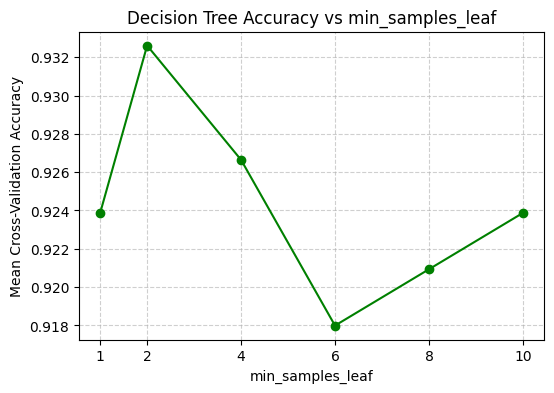

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(leaf_sizes, means, marker='o', linestyle='-', color='g')
plt.title("Decision Tree Accuracy vs min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.xticks(leaf_sizes)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


The best generalization occurs at min_samples_leaf = 2, which gives the highest mean accuracy (0.9326) with a relatively low standard deviation (0.0315). Smaller leaf sizes (1) can overfit, while larger leaf sizes (6–10) tend to underfit, reducing accuracy.